In [1]:
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import load_model
from beeid2.models import simple_cnnv2, ContrastiveLearning
from beeid2.data_utils import filename2image
from beeid2.evaluation import mAP_evaluation, mAP_track_model_evaluation, cmc_track_model_evaluation
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, auc
from tqdm import tqdm
import glob

def to_np_array(values, dim=128):
    return np.concatenate(list(values)).reshape(-1, dim)


In [6]:
benchmark = dict()
models_files = glob.glob("../../models4/*/*.tf")
for model_file in models_files:
    model = load_model(model_file)
    benchmark[model_file] = mAP_evaluation(model)

13/13 [==============================] - 1s 100ms/step


  1%|          | 7/654 [00:00<00:09, 65.77it/s]

Evaluating 654 tracks.


100%|██████████| 654/654 [00:11<00:00, 55.77it/s]


Evaluating 3173 queries.
13/13 [==============================] - 1s 82ms/step


  0%|          | 0/654 [00:00<?, ?it/s]

Evaluating 654 tracks.


100%|██████████| 654/654 [00:13<00:00, 48.76it/s]


Evaluating 3173 queries.
13/13 [==============================] - 1s 85ms/step


  0%|          | 0/654 [00:00<?, ?it/s]

Evaluating 654 tracks.


100%|██████████| 654/654 [00:12<00:00, 52.62it/s]


Evaluating 3173 queries.
13/13 [==============================] - 1s 86ms/step


  0%|          | 0/654 [00:00<?, ?it/s]

Evaluating 654 tracks.


100%|██████████| 654/654 [00:13<00:00, 50.12it/s]


Evaluating 3173 queries.
13/13 [==============================] - 1s 84ms/step


  0%|          | 0/654 [00:00<?, ?it/s]

Evaluating 654 tracks.


100%|██████████| 654/654 [00:13<00:00, 49.77it/s]


Evaluating 3173 queries.
13/13 [==============================] - 1s 84ms/step


  0%|          | 0/654 [00:00<?, ?it/s]

Evaluating 654 tracks.


100%|██████████| 654/654 [00:12<00:00, 52.02it/s]


Evaluating 3173 queries.
13/13 [==============================] - 1s 84ms/step


  0%|          | 0/654 [00:00<?, ?it/s]

Evaluating 654 tracks.


100%|██████████| 654/654 [00:12<00:00, 52.39it/s]


Evaluating 3173 queries.
13/13 [==============================] - 1s 84ms/step


  0%|          | 0/654 [00:00<?, ?it/s]

Evaluating 654 tracks.


100%|██████████| 654/654 [00:11<00:00, 55.62it/s]

Evaluating 3173 queries.


{}

<AxesSubplot:xlabel='model'>

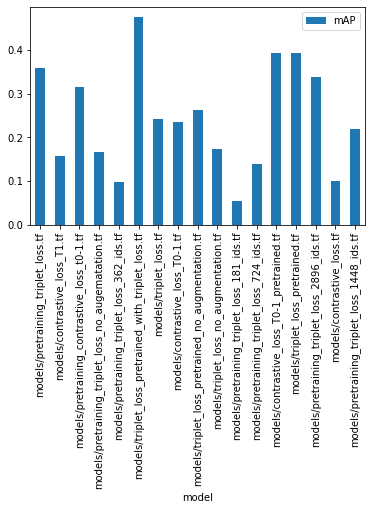

In [3]:
pd.DataFrame({ "model":benchmark.keys(), "mAP": benchmark.values()}).plot.bar(x="model")

In [2]:
MODEL = "../../models2/2111240952_tagged_augmentataion_untagged_augmentataion_simplecnnv2_convb3_dim_128/model.tf"

In [5]:
TRACK_LEN=4
batch_size = 1

def random_sampling(x):
    rand_idx = tf.random.uniform(shape=[], maxval=TRACK_LEN, dtype=tf.int32)
    return x[:, rand_idx, :]
    

base_model = load_model(MODEL)
track_model = tf.keras.Sequential()
track_model.add(tf.keras.layers.TimeDistributed(base_model, input_shape=(TRACK_LEN, 56, 56, 3)))
track_model.add(tf.keras.layers.Lambda(random_sampling))
track_model.summary()

mAP_track_model_evaluation(track_model, track_len=TRACK_LEN, timegap=15, timegap_unit="m", batch_size=batch_size)
# results = list()
# for i in tqdm(range(100)):
#     r = mAP_track_model_evaluation(track_model, track_len=TRACK_LEN, timegap=15, timegap_unit="m", batch_size=batch_size)
#     results.append(r)
# np.mean(results)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
time_distributed_1 (TimeDist (None, 4, 128)            1815040   
_________________________________________________________________
lambda_2 (Lambda)            (None, 128)               0         
Total params: 1,815,040
Trainable params: 1,814,336
Non-trainable params: 704
_________________________________________________________________
228/228 [==============================] - 1s 3ms/step
Evaluating 228 tracks.
Evaluating 198 queries.


0.6265073876751738

In [6]:
mAP_track_model_evaluation(track_model, track_len=TRACK_LEN, timegap=1, timegap_unit="D", batch_size=batch_size)

228/228 [==============================] - 1s 3ms/step
Evaluating 228 tracks.
Evaluating 43 queries.


0.45018842916725926

In [3]:
TRACK_LEN=4
base_model = load_model(MODEL)
track_model = tf.keras.Sequential()
track_model.add(tf.keras.layers.TimeDistributed(base_model, input_shape=(TRACK_LEN, 56, 56, 3)))
track_model.add(tf.keras.layers.Lambda(lambda x: tf.math.reduce_mean(x, axis=1)))
track_model.summary()

mAP_track_model_evaluation(track_model, track_len=TRACK_LEN, timegap=15, timegap_unit="m")

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
time_distributed (TimeDistri (None, 4, 128)            1815040   
_________________________________________________________________
lambda_1 (Lambda)            (None, 128)               0         
Total params: 1,815,040
Trainable params: 1,814,336
Non-trainable params: 704
_________________________________________________________________
4/4 [==============================] - 1s 125ms/step
Evaluating 228 tracks.
Evaluating 198 queries.


0.7840960498992582

In [4]:
mAP_track_model_evaluation(track_model, track_len=TRACK_LEN, timegap=1, timegap_unit="D")

4/4 [==============================] - 0s 83ms/step
Evaluating 228 tracks.
Evaluating 43 queries.


0.5752394245766895

In [2]:
TRACK_LEN=4
track_model = load_model("track_models/2110252243_untagged_augmentataion_Track_mean_simplecnnv2_convb3_dim_128/model.tf")




In [5]:
track_model.compile()

In [3]:
track_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
time_distributed (TimeDistri (None, 4, 128)            1815040   
_________________________________________________________________
track_distance_loss (TrackDi (None, 4, 128)            0         
_________________________________________________________________
lambda_1 (Lambda)            (None, 128)               0         
_________________________________________________________________
lambda_2 (Lambda)            (None, 128)               0         
Total params: 1,815,040
Trainable params: 1,814,336
Non-trainable params: 704
_________________________________________________________________


In [5]:
track_model.layers[0].layer.summary()

Model: "simplecnnv2_convb3_dim_128"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 56, 56, 3)]  0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 56, 56, 32)   4736        input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 56, 56, 32)   128         conv2d[1][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 56, 56, 32)   0           batch_normalization[1][0]        
_________________________________________________________________________

In [17]:
mAP_track_model_evaluation(track_model, track_len=TRACK_LEN, timegap=15, timegap_unit="m")

4/4 [==============================] - 0s 83ms/step
Evaluating 228 tracks.
Evaluating 198 queries.


0.7738738512041109

In [27]:
sd = pd.read_csv("../../data/test_same_hour3.csv")
sd = sd[sd.image_id < (10 + 2)]
sd_ranks = cmc_track_model_evaluation(track_model, sd)
sd_ranks

11/11 [==============================] - 1s 115ms/step


array([0.77168421, 0.8825    , 0.92689474, 0.95052632, 0.9705    ,
       0.98857895, 0.99152632, 0.99586842, 0.99726316, 0.99744737])

In [24]:
dfsd = pd.read_csv("../../data/test_different_day_same_hour3.csv")
dfsd = dfsd[dfsd.image_id < (10 + 2)]
dfsd_ranks = cmc_track_model_evaluation(track_model, dfsd)
dfsd_ranks

11/11 [==============================] - 1s 115ms/step


array([0.65472574, 0.79873418, 0.87050633, 0.91848101, 0.95662447,
       0.98367089, 0.99548523, 0.99907173, 1.        , 1.        ])

In [25]:
df = pd.read_csv("../../data/test_different_day3.csv")
df = df[df.image_id < (10 + 2)]
df_ranks = cmc_track_model_evaluation(track_model, df)
df_ranks

11/11 [==============================] - 2s 170ms/step


array([0.55703752, 0.71493088, 0.81727452, 0.8779921 , 0.92404213,
       0.95117182, 0.97009217, 0.98454905, 0.99242265, 0.99740619])

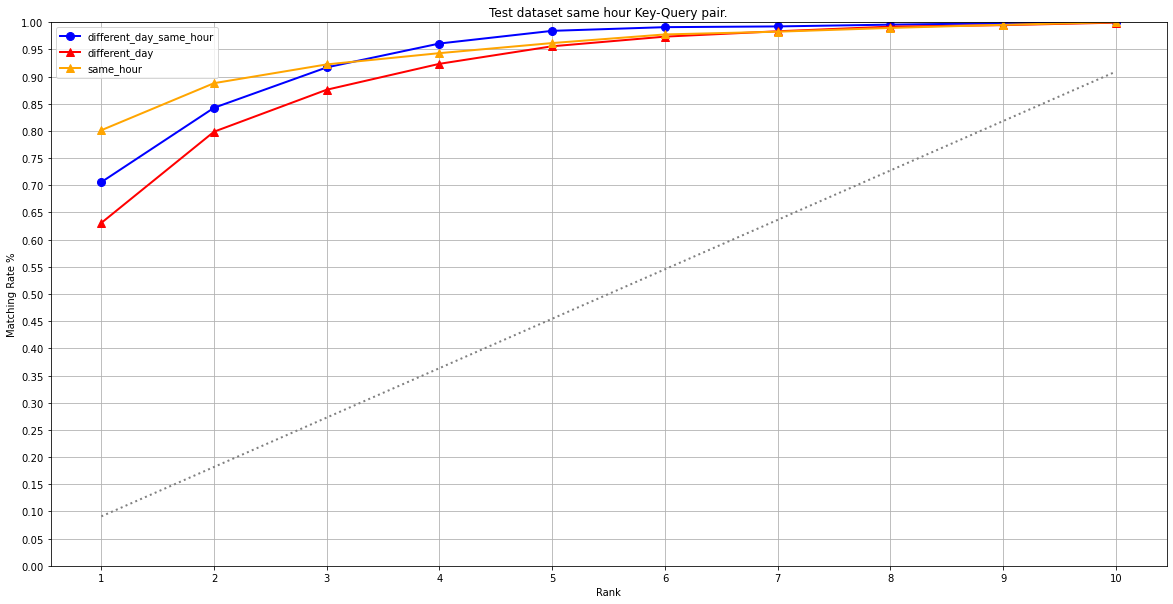

In [21]:

x = np.arange(1, 10 + 1)
plt.figure(figsize=(20, 10))
plt.plot(x, dfsd_ranks, 'bo-', markersize=8,
         linewidth=2, label="different_day_same_hour")
# plt.plot(x, triplet_df["valid_cmc_only_train_ids"], 'b-', linewidth=2)

plt.plot(x, df_ranks, 'r^-', markersize=8,
         linewidth=2, label="different_day")

plt.plot(x, sd_ranks, '^-', color="orange", markersize=8,
         linewidth=2, label="same_hour")

plt.plot(x, x/11, ':', linewidth=2, color="gray")
plt.grid(True)
plt.ylim(0.0, 1.0)
plt.yticks(np.arange(0, 1.05, 0.05));
plt.xticks(np.arange(1, 10 + 1, 1));
plt.xlabel("Rank")
plt.ylabel("Matching Rate %")
plt.tick_params(axis='y', which='minor', bottom=False)
plt.title("Test dataset same hour Key-Query pair.");
plt.legend()